In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Manoj\1ExcelR\Data\market.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Region      390 non-null    object
 1   Product     390 non-null    object
 2   Subsidiary  390 non-null    object
 3   Stores      390 non-null    int64 
 4   Sales       390 non-null    int64 
 5   Inventory   390 non-null    int64 
 6   Returns     390 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 21.5+ KB


In [4]:
df.head()

Region       Product   Subsidiary  Stores  Sales  Inventory  Returns
0  Africa          Boot  Addis Ababa      12  29761     191821      769
1  Africa  Men's Casual  Addis Ababa       4  67242     118036     2284
2  Africa   Men's Dress  Addis Ababa       7  76793     136273     2433
3  Africa        Sandal  Addis Ababa      10  62819     204284     1861
4  Africa       Slipper  Addis Ababa      14  68641     279795     1771

In [5]:
df['Product'].unique()

array(['Boot', "Men's Casual", "Men's Dress", 'Sandal', 'Slipper',
       'Sport Shoe', "Women's Casual", "Women's Dress"], dtype=object)

In [6]:
df['Product'].value_counts()

Product
Boot              52
Slipper           51
Sport Shoe        51
Women's Dress     50
Men's Dress       49
Sandal            49
Women's Casual    45
Men's Casual      43
Name: count, dtype: int64

In [7]:
pd.crosstab(df["Region"],df["Product"])

Product                    Boot  Men's Casual  Men's Dress  Sandal  Slipper  \
Region                                                                        
Africa                        8             5            7       8        8   
Asia                          2             1            2       2        2   
Canada                        5             4            3       5        4   
Central America/Caribbean     4             3            4       4        4   
Eastern Europe                4             4            4       3        4   
Middle East                   3             2            3       3        3   
Pacific                       6             5            6       6        6   
South America                 7             6            7       7        7   
United States                 5             5            5       5        5   
Western Europe                8             8            8       6        8   

Product                    Sport Shoe  Women's Casual  Women's Dress  
Region                                                                
Africa                              8               4              8  
Asia                                2               2              1  
Canada                              5               4              4  
Central America/Caribbean           4               4              4  
Eastern Europe                      4               4              4  
Middle East                         3               3              3  
Pacific                             5               5              6  
South America                       7               6              7  
United States                       5               5              5  
Western Europe                      8               8              8

In [ ]:
df.groupby('Product')['Sales'].mean()

In [8]:
df['TotalQnt'] = df['Inventory']+ df['Returns']
df.head()

Region       Product   Subsidiary  Stores  Sales  Inventory  Returns  \
0  Africa          Boot  Addis Ababa      12  29761     191821      769   
1  Africa  Men's Casual  Addis Ababa       4  67242     118036     2284   
2  Africa   Men's Dress  Addis Ababa       7  76793     136273     2433   
3  Africa        Sandal  Addis Ababa      10  62819     204284     1861   
4  Africa       Slipper  Addis Ababa      14  68641     279795     1771   

   TotalQnt  
0    192590  
1    120320  
2    138706  
3    206145  
4    281566

In [11]:
df.to_csv(r"D:\Manoj\1ExcelR\Data\market1.csv",index=False)

In [12]:
# regions and sales
# which region contians highest sales
t1 = df.groupby("Region")['Sales'].sum()
t1

Region
Africa                       2342588
Asia                          460231
Canada                       2041054
Central America/Caribbean    3081641
Eastern Europe               2394940
Middle East                  4333062
Pacific                      2296794
South America                2434783
United States                5503986
Western Europe               4873000
Name: Sales, dtype: int64

In [13]:
t2 = t1.sort_values() 
t2


Region
Asia                          460231
Canada                       2041054
Pacific                      2296794
Africa                       2342588
Eastern Europe               2394940
South America                2434783
Central America/Caribbean    3081641
Middle East                  4333062
Western Europe               4873000
United States                5503986
Name: Sales, dtype: int64

In [14]:
type(t1)

pandas.core.series.Series

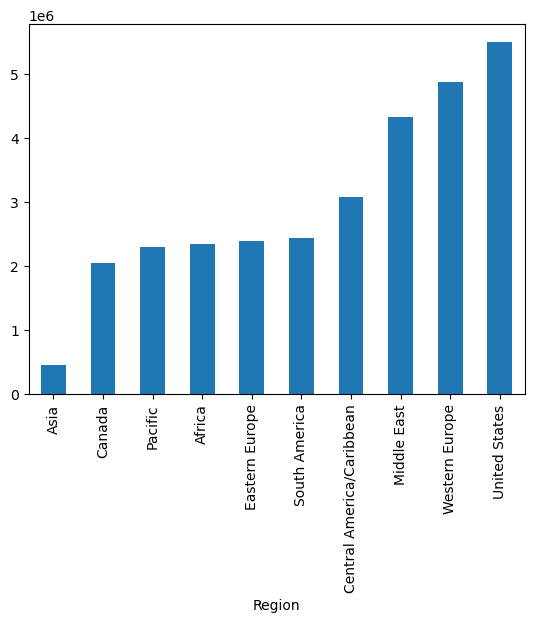

In [15]:
t2.plot(kind='bar');

Text(0, 0.5, 'Sales')

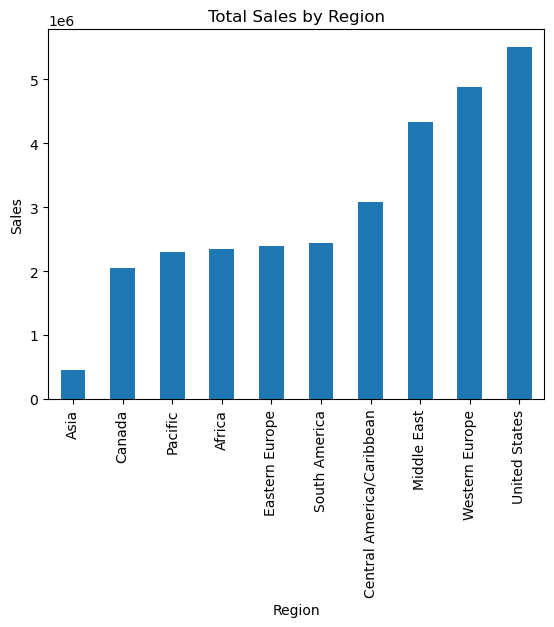

In [16]:
t2.plot(kind='bar');
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')

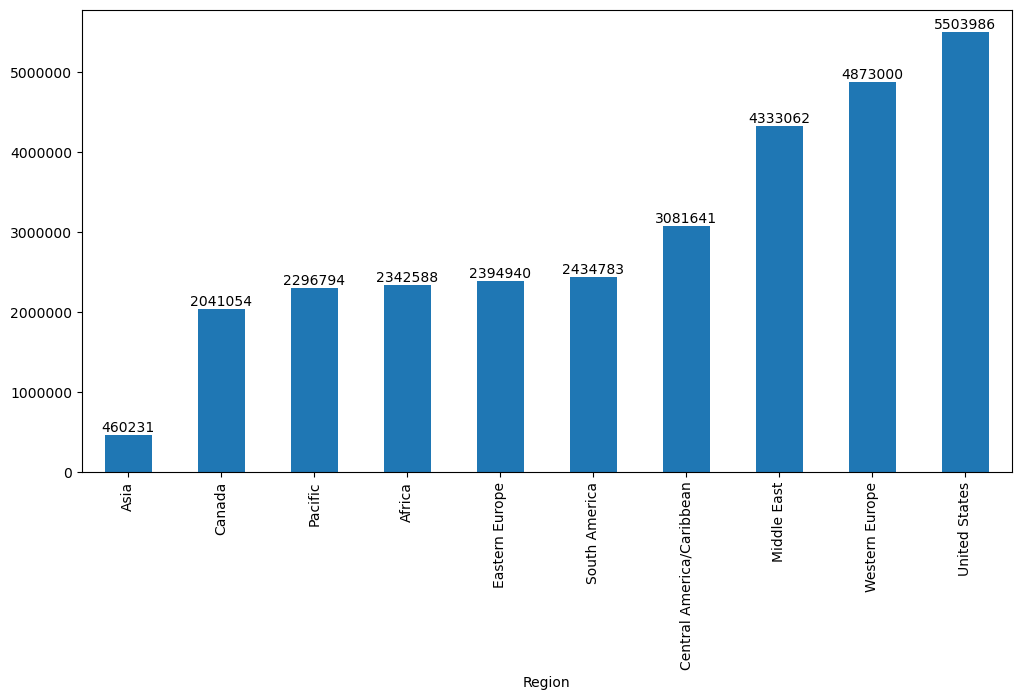

In [19]:
ax = t2.plot(kind='bar', figsize=(12, 6))
ax.ticklabel_format(style='plain', axis='y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

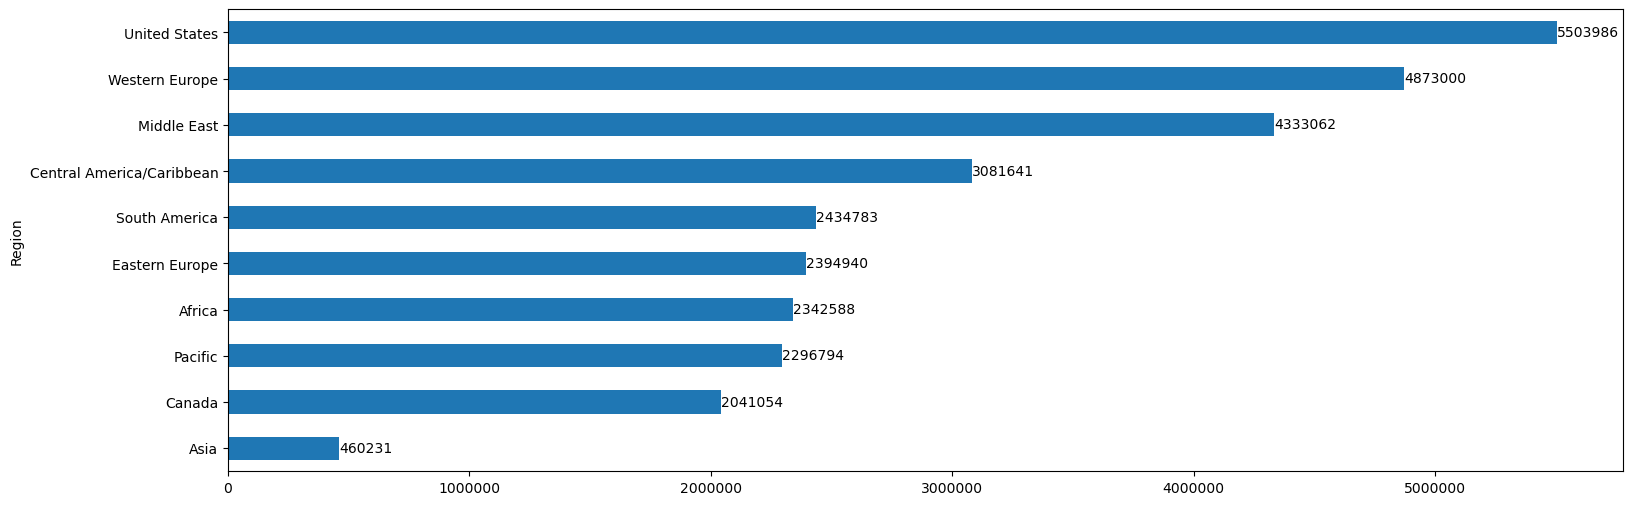

In [20]:
ax = t2.plot(kind='barh', figsize=(18, 6))
ax.ticklabel_format(style='plain', axis='x') # Changed axis to 'x' for horizontal bar chart

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge') # Adjusted label type for horizontal bars

In [21]:
df_frequency = df["Region"].value_counts()
df_frequency

Region
Western Europe               62
Africa                       56
South America                54
Pacific                      45
United States                40
Canada                       34
Eastern Europe               31
Central America/Caribbean    31
Middle East                  23
Asia                         14
Name: count, dtype: int64

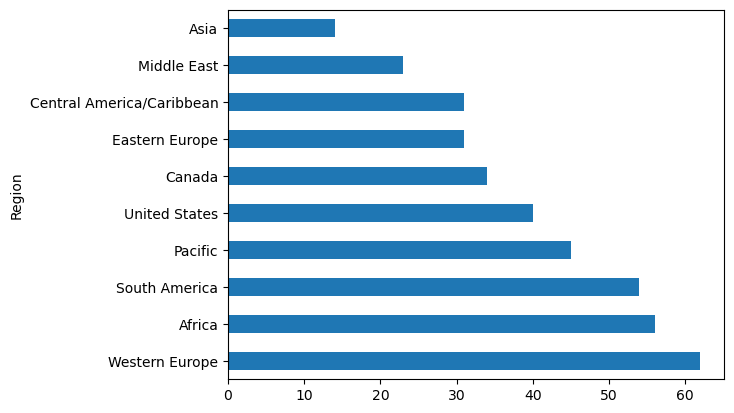

In [23]:
df_frequency.plot(kind='barh');

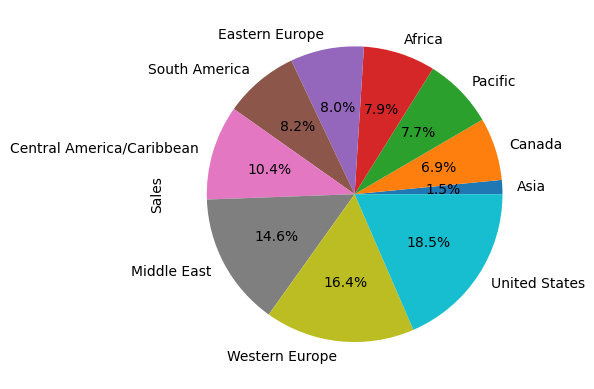

In [25]:
t2.plot(kind='pie', autopct='%.1f%%', ylabel='');

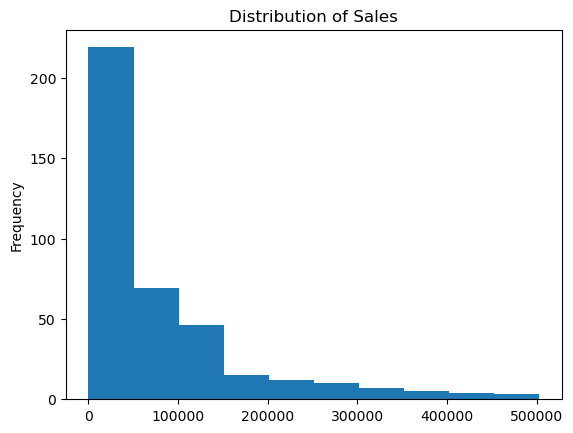

In [30]:
# Histogram:
df['Sales'].plot(kind='hist', bins=20, title='Distribution of Sales');

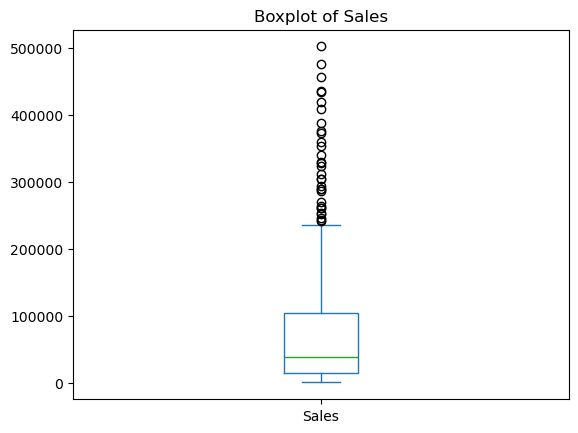

In [31]:
# Boxplot
df['Sales'].plot(kind='box', title='Boxplot of Sales');

In [29]:
df['Sales'].describe()

count       390.000000
mean      76313.023077
std       95418.194363
min         325.000000
25%       15124.500000
50%       38005.500000
75%      104344.750000
max      502636.000000
Name: Sales, dtype: float64

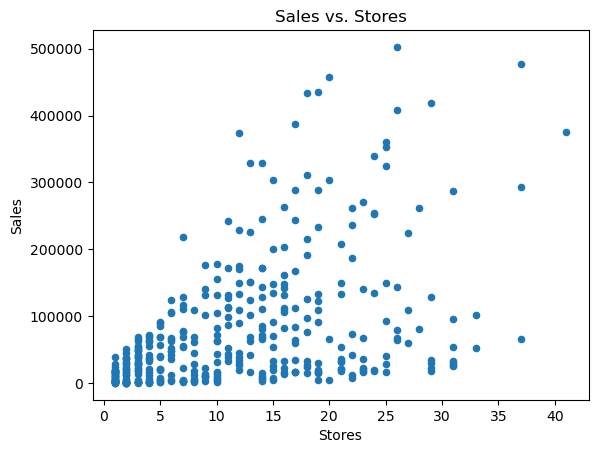

In [32]:
#Scatter plot using directly pandas dataframe
df.plot(kind='scatter', x='Stores', y='Sales', title='Sales vs. Stores');

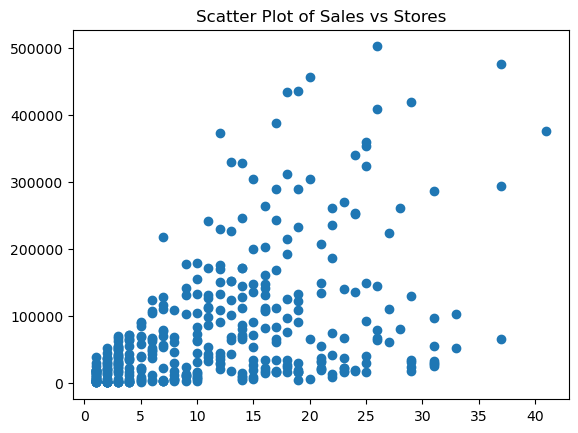

In [33]:
#Scatter plot using matplotlib
plt.scatter(df['Stores'], df['Sales'])
plt.title('Scatter Plot of Sales vs Stores')
plt.show()

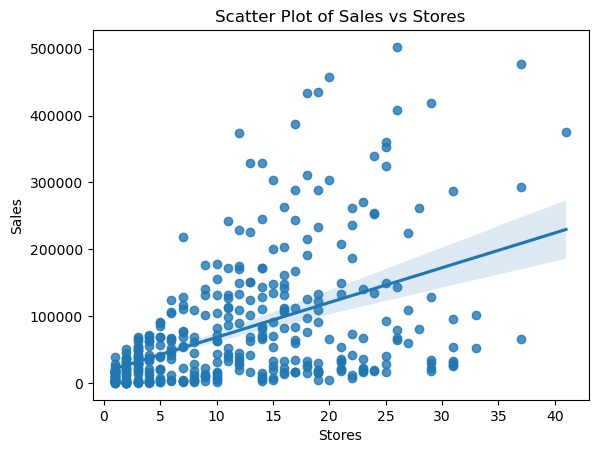

In [35]:
# Scatter plot using Seaborn with regression line
sns.regplot(data=df, x='Stores', y='Sales', ci=None)  # ci=None removes the confidence interval
plt.title('Scatter Plot of Sales vs Stores')
plt.show()

In [36]:
#Correlation Heatmap (Sales, Inventory, Returns, Stores)
correlation_matrix = df[['Stores', 'Sales', 'Inventory', 'Returns']].corr()
correlation_matrix


Stores     Sales  Inventory   Returns
Stores     1.000000  0.479798   0.536082  0.494190
Sales      0.479798  1.000000   0.941193  0.966123
Inventory  0.536082  0.941193   1.000000  0.899899
Returns    0.494190  0.966123   0.899899  1.000000

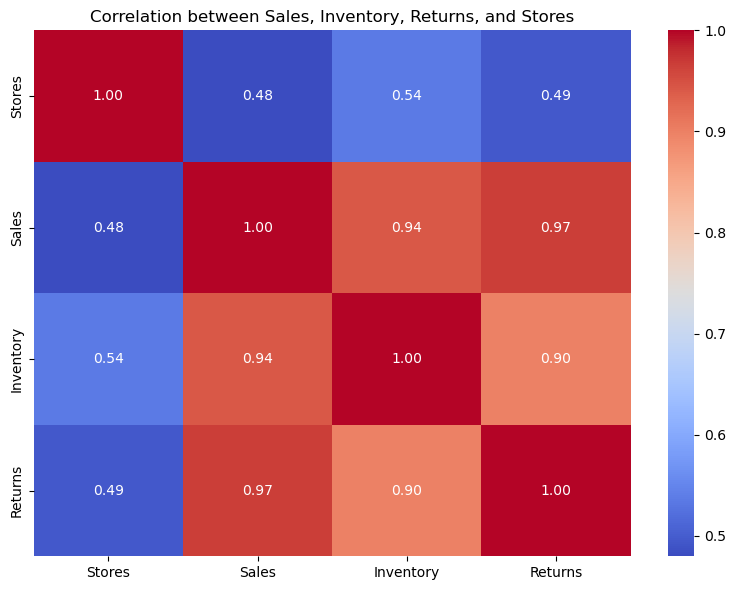

In [37]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Sales, Inventory, Returns, and Stores')
plt.tight_layout()
plt.show();